In [8]:
import torch
import numpy as np
from torch import nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 5.让我的模型更好之设置He初始化
def he_init(m):
    if isinstance(m, nn.Linear):
        nn.init.kaiming_uniform_(m.weight, nonlinearity='relu')
        nn.init.zeros_(m.bias)


#定义MLP模型，设置参数
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP,self).__init__()
        self.fc1 =nn.Linear (input_size,hidden_size)
        self.fc2 =nn.Linear (hidden_size,output_size)
        self.sigmoid = nn.Sigmoid()  # 添加Sigmoid激活函数
        self.apply(he_init)
    #定义激活函数
    def relu(self, x):
        a = torch.zeros_like(x)
        return torch.max(x,a)
        #self._init_weight()



    #前向传播
    def forward(self, x):
        out = self.fc1 (x)
        out = self.relu(out)
        out = self.fc2 (out)
        out = self.sigmoid(out)
       
        return out
        """
        初始化多层感知机
        input_size: 输入特征维度
        hidden_size: 隐藏状态维度  
        output_size: 输出维度
        """

In [9]:
#生成数据集，设置内外圆的半径和对应的标签
def generate_circles(n_samples=1000, noise=0.05):
    x, y = make_circles(n_samples=n_samples, noise=noise, factor=0.4, random_state=42)
    radii = np.sqrt(x[:, 0]**2 + x[:, 1]**2)
    inner = radii < 0.4
    outer = radii > 0.6
    y[inner] = 0
    y[outer] = 1
    
    return x, y
#划分训练测试集
x, y = generate_circles(n_samples=1000, noise=0.05)
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42 )

In [10]:
def train_model(model, X_train, y_train, x_test, y_test,epochs=150, lr=0.1):
    # 用了二元交叉熵损失，用于二分类任务的损失函数，loss体现模型对标签的预测概率分布与真实分布之间的差异
    criterion = nn.BCELoss()
    # 用了随机梯度下降。每次迭代随机选择一小批样本算梯度
    #optimizer = optim.SGD(model.parameters(), lr=lr)
    # 5.让我的模型更好之自动优化
    optimizer = optim.Adam(model.parameters(), lr=lr)
    #将np数组转化为张量
    x_train_tensor = torch.FloatTensor(x_train)
    y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)
    x_test_tensor = torch.FloatTensor(x_test)
    y_test_tensor = torch.FloatTensor(y_test).view(-1, 1)
    #挖坑()
    losses = []
    accuracies =[]

    for epoch in range(epochs):
        model.train()
        outputs = model(x_train_tensor)
        #算loss
        loss = criterion(outputs, y_train_tensor)
        optimizer.zero_grad()#清空梯度
        loss.backward()#算
        optimizer.step()#更新参数
        losses.append(loss.item())#填坑
    
        if epoch % 10 == 0:
            model.eval()#启动锐评模式
            with torch.no_grad():
                #引入test数据集
                test_outputs = model(x_test_tensor)
                test_preds = (test_outputs > 0.5).float()
                accuracy = (test_preds == y_test_tensor).float().mean()#算吧
                accuracies.append(accuracy.item())
                
                print(f'Epoch [{epoch}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item():.4f}')
    
    return losses, accuracies

model = MLP(input_size=2, hidden_size=10, output_size=1)

# 训练模型
losses, accuracies = train_model(model, x_train, y_train, x_test, y_test, epochs=150, lr=0.1)
    

Epoch [0], Loss: 0.8004, Accuracy: 0.6000
Epoch [10], Loss: 0.4225, Accuracy: 0.8150
Epoch [20], Loss: 0.3194, Accuracy: 0.8150
Epoch [30], Loss: 0.2658, Accuracy: 0.8800
Epoch [40], Loss: 0.2294, Accuracy: 0.9200
Epoch [50], Loss: 0.2012, Accuracy: 0.9450
Epoch [60], Loss: 0.1762, Accuracy: 0.9600
Epoch [70], Loss: 0.1552, Accuracy: 0.9800
Epoch [80], Loss: 0.1380, Accuracy: 0.9800
Epoch [90], Loss: 0.1241, Accuracy: 0.9800
Epoch [100], Loss: 0.1127, Accuracy: 0.9800
Epoch [110], Loss: 0.1035, Accuracy: 0.9800
Epoch [120], Loss: 0.0965, Accuracy: 0.9800
Epoch [130], Loss: 0.0900, Accuracy: 0.9800
Epoch [140], Loss: 0.0847, Accuracy: 0.9800


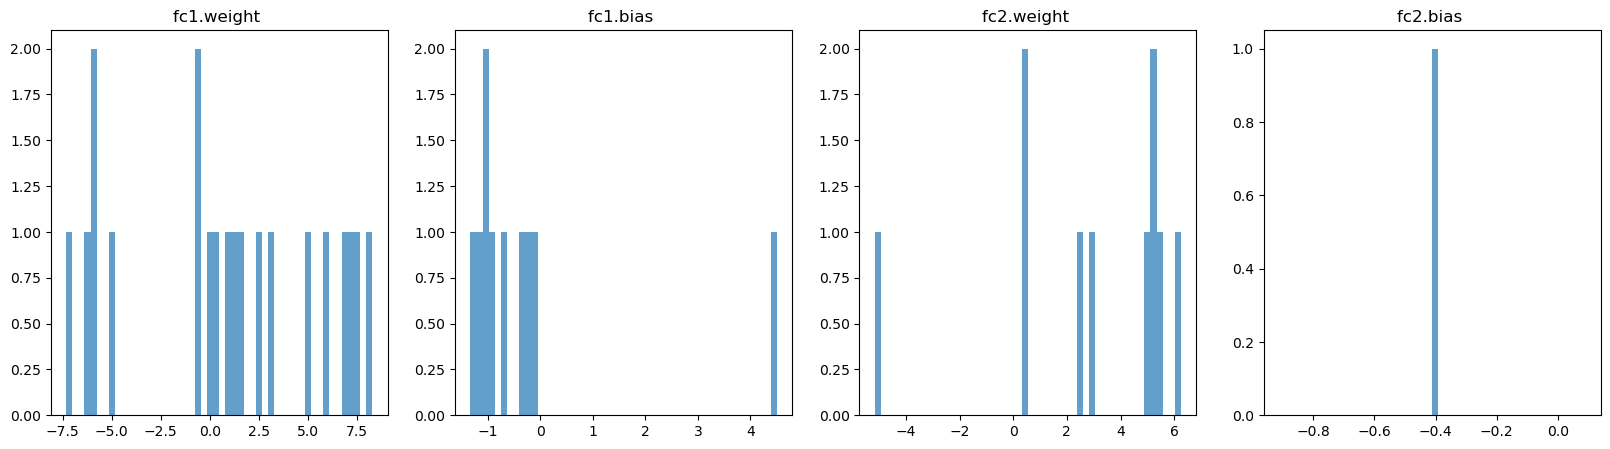

In [11]:
# 获取模型参数并绘制分布图
def plot_parameter_distribution(model):
    params = []
    names = []
    
    # 收集所有参数，记录它们的名字
    for name, param in model.named_parameters():
        if param.requires_grad:
            #将二维参数变为一维数组，并转换为np数组
            params.append(param.data.flatten().numpy())
            names.append(name)
    
    # 绘制分布图
    # 创建子图
    fig, axes = plt.subplots(1, len(params), figsize=(5*len(params), 5))
    for i, (param_data, name) in enumerate(zip(params, names)):
        #绘制参数值的直方图
        axes[i].hist(param_data, bins=50, alpha=0.7)
        axes[i].set_title(f'{name} ')

    plt.show()

# 在训练完成后调用
plot_parameter_distribution(model)